In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-ml/sample_submission.csv
/kaggle/input/shai-ml/train.csv
/kaggle/input/shai-ml/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/shai-ml/train.csv")

In [3]:
train

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
test = pd.read_csv("/kaggle/input/shai-ml/test.csv")

In [5]:
test

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46
...,...,...,...,...,...,...,...,...,...,...
10895,53922,0.70,Very Good,E,VS2,62.8,60.0,5.59,5.65,3.53
10896,53923,0.70,Very Good,D,VS1,63.1,59.0,5.67,5.58,3.55
10897,53933,0.70,Very Good,E,VS2,60.5,59.0,5.71,5.76,3.47
10898,53934,0.70,Very Good,E,VS2,61.2,59.0,5.69,5.72,3.49


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
train.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
train.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.374606,-0.040978,-0.116833,-0.301711,-0.407353,-0.395176,-0.400306
carat,-0.374606,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625
depth,-0.040978,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335
table,-0.116833,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775
price,-0.301711,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625
x,-0.407353,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909
y,-0.395176,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215
z,-0.400306,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000


<AxesSubplot:>

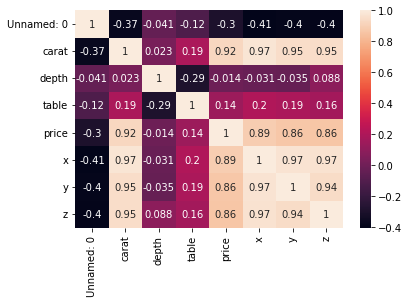

In [9]:
sns.heatmap(train.corr(), annot = True)

In [10]:
train["Volume"] = train.x * train.y * train.z

In [11]:
train

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870
...,...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,116.721246
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [12]:
train.corr()["price"].sort_values()

Unnamed: 0   -0.301711
depth        -0.014393
table         0.136975
z             0.860625
y             0.863748
x             0.887483
Volume        0.900422
carat         0.923801
price         1.000000
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

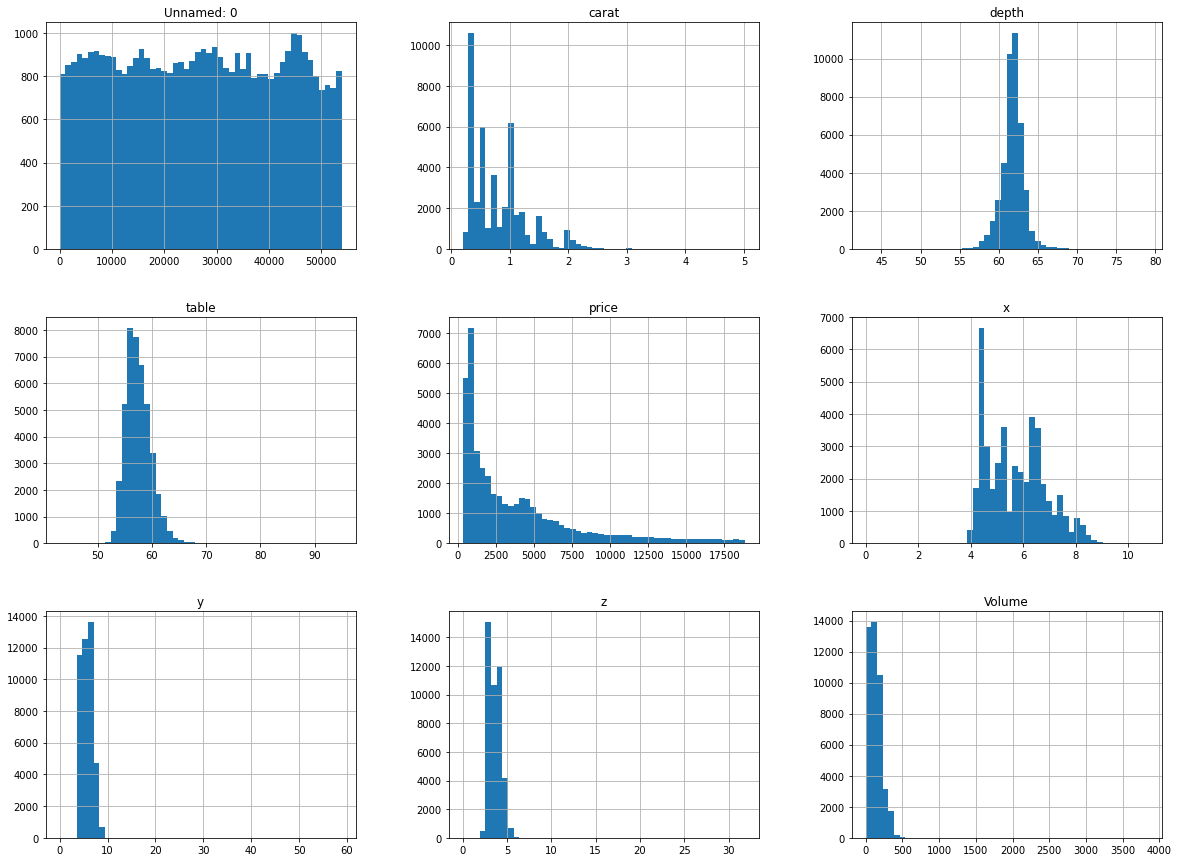

In [13]:
train.hist(bins = 50, figsize = (20, 15))

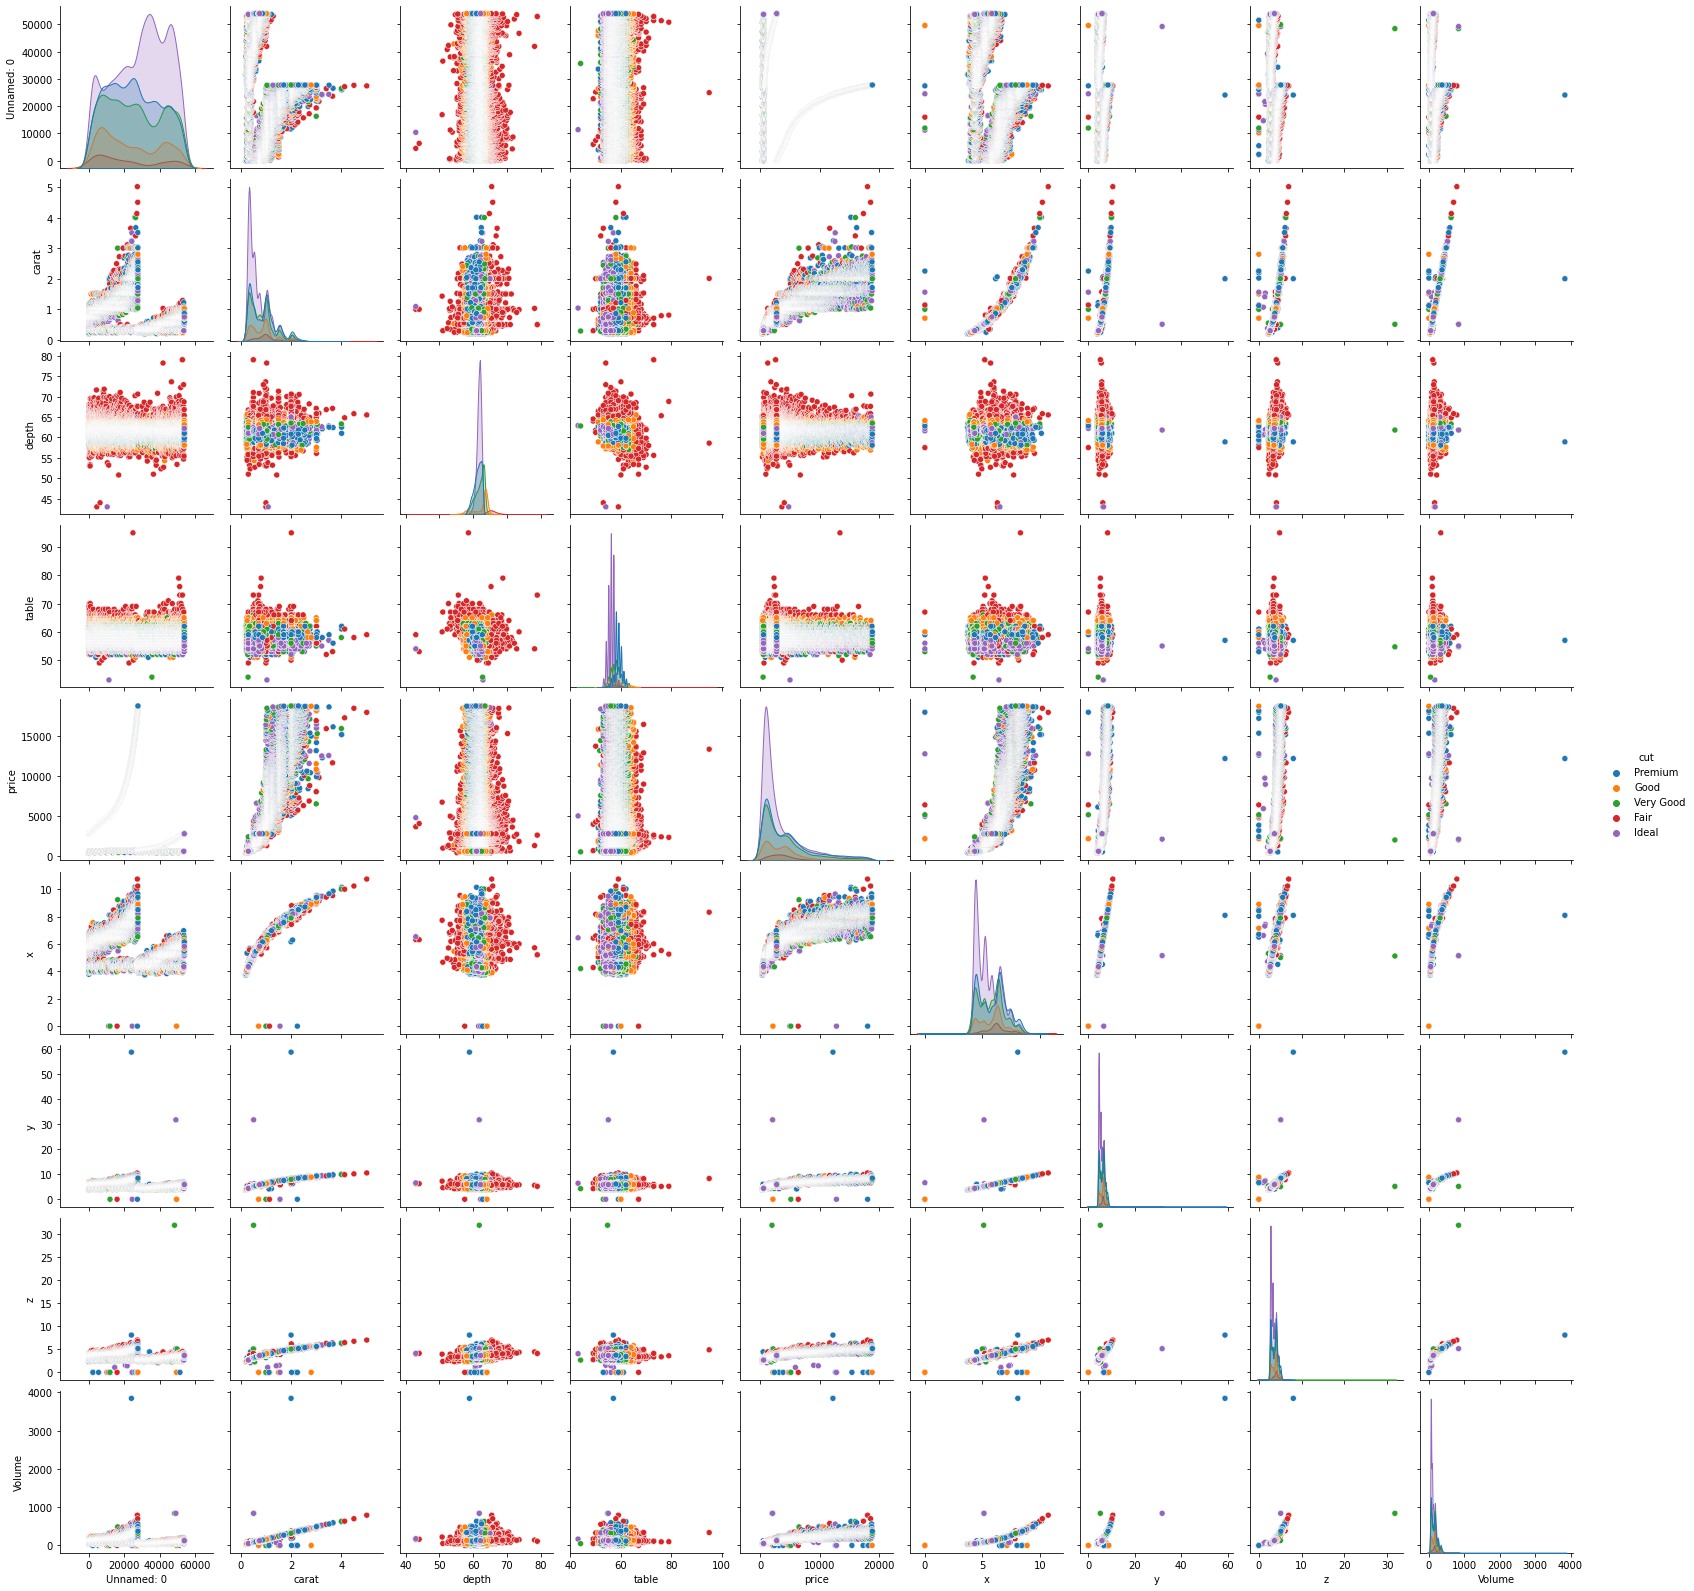

In [14]:
sns.pairplot(train, hue = "cut")

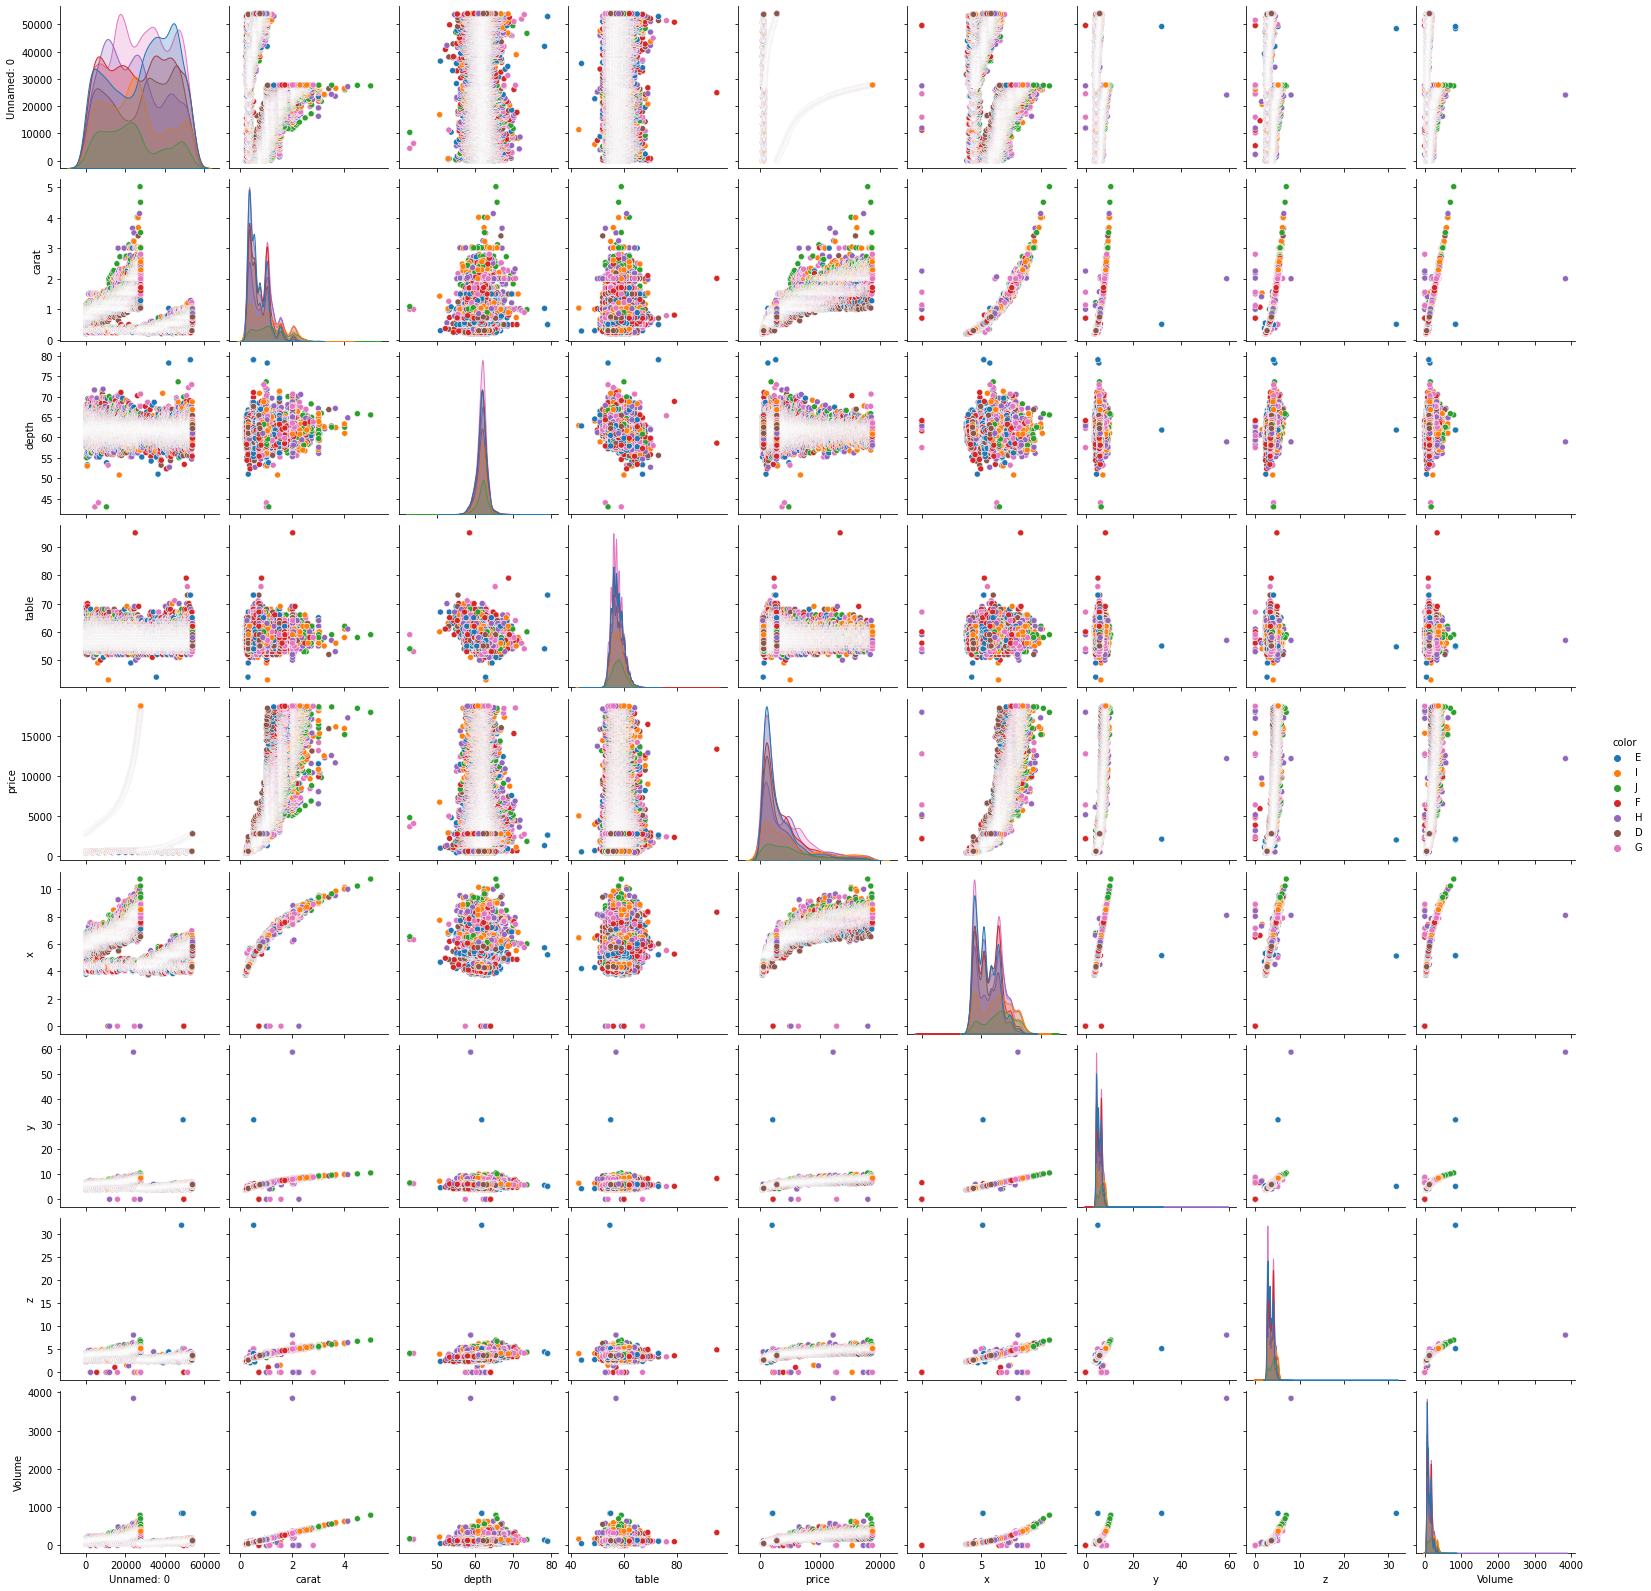

In [15]:
sns.pairplot(train, hue = "color")

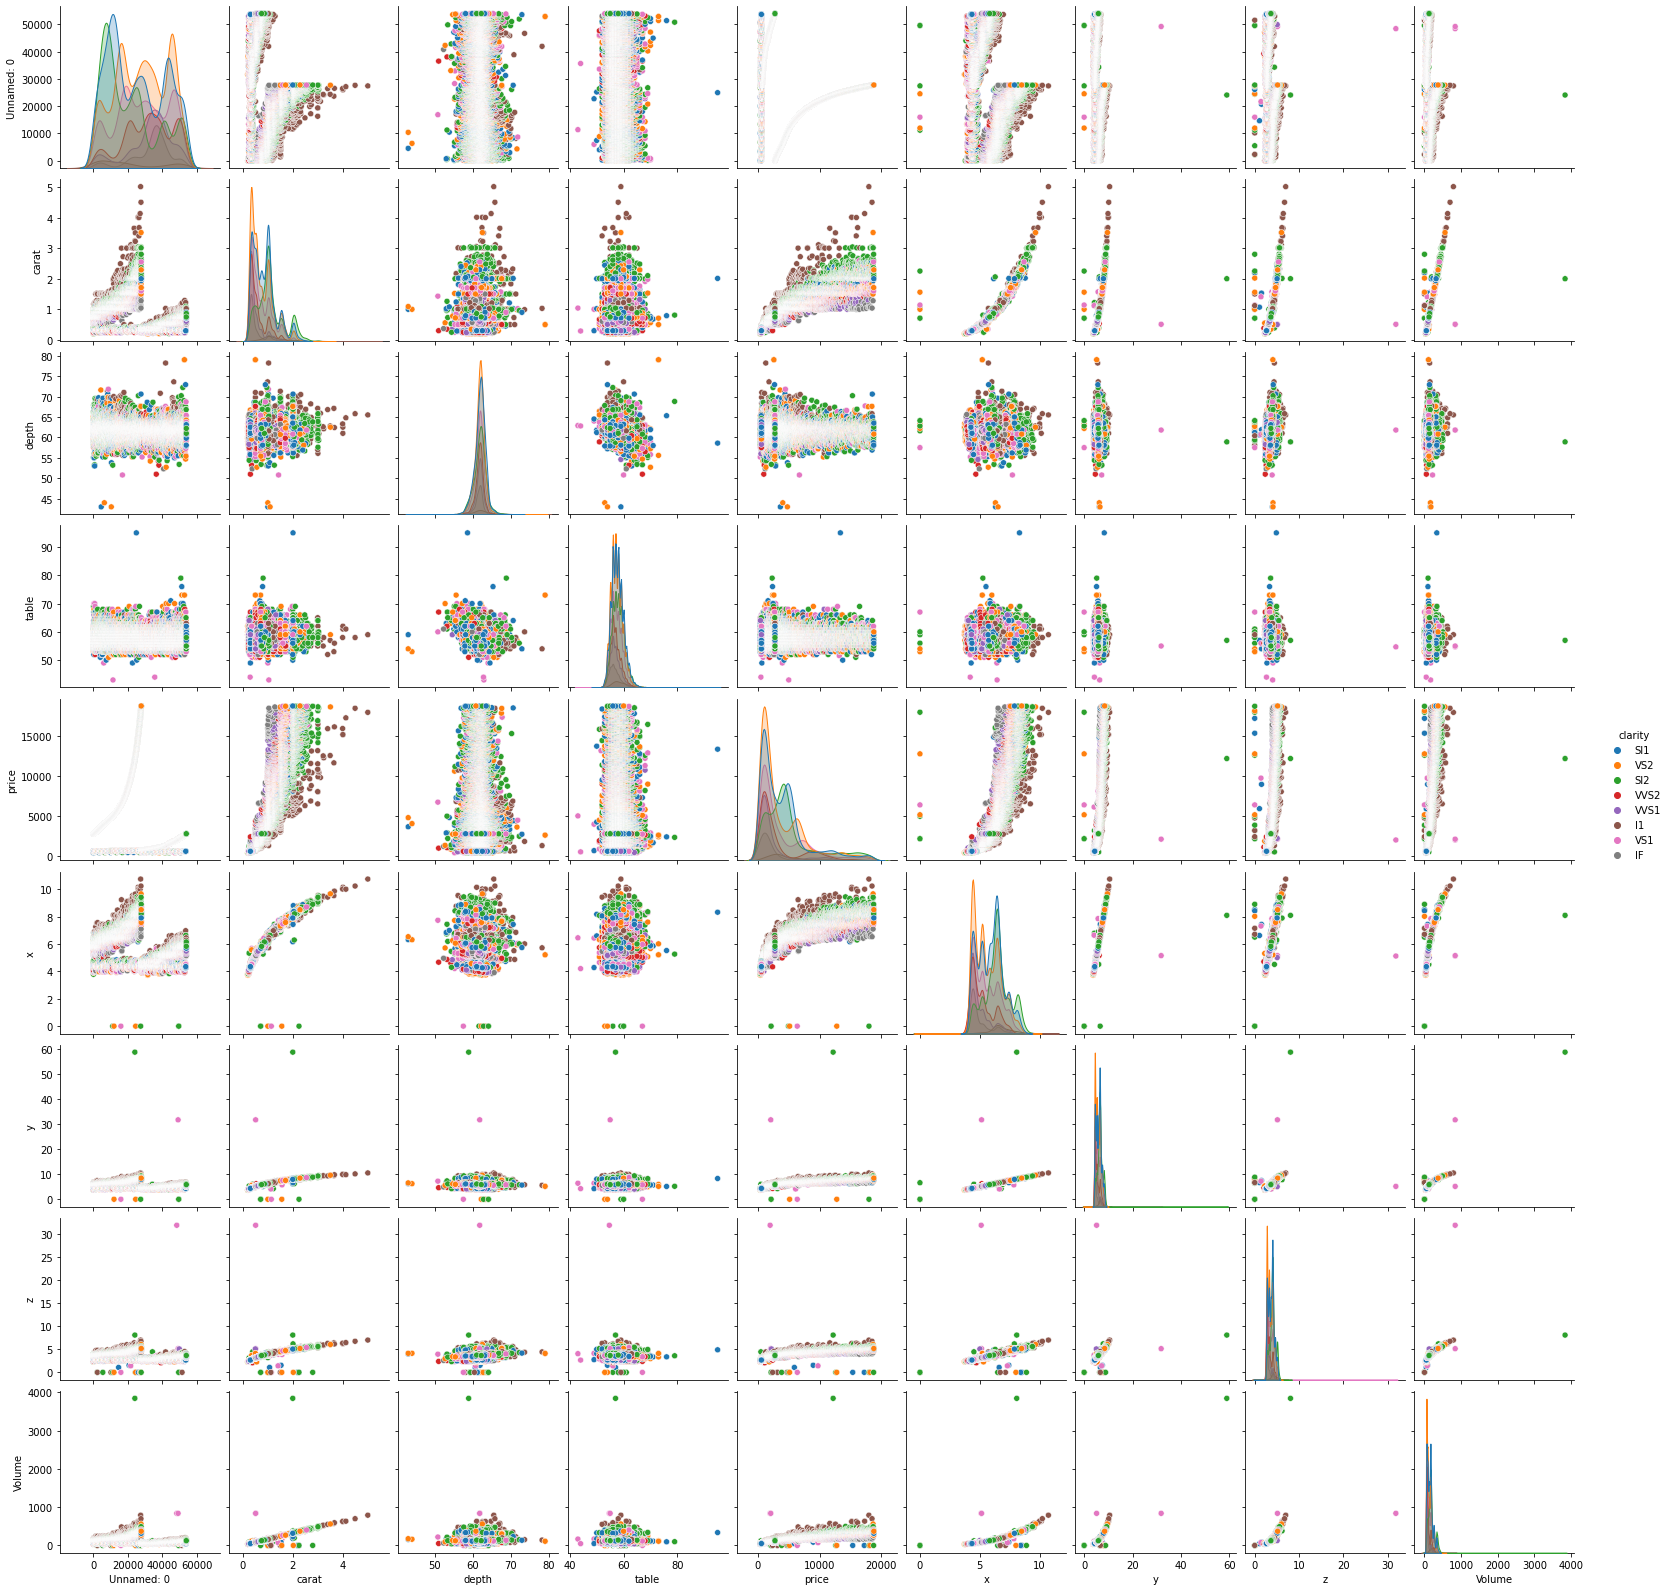

In [16]:
sns.pairplot(train, hue = "clarity")

<AxesSubplot:xlabel='price', ylabel='cut'>

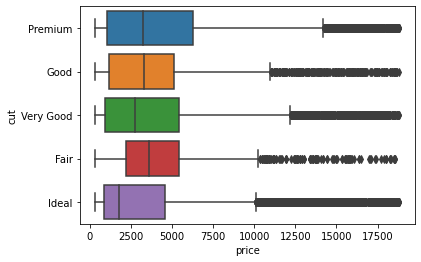

In [17]:
sns.boxplot(x = train.price, y = train["cut"])

<AxesSubplot:xlabel='price', ylabel='color'>

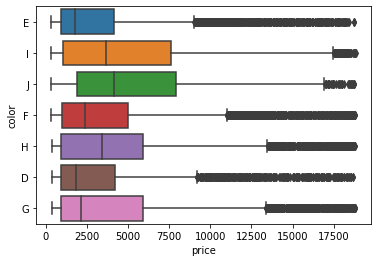

In [18]:
sns.boxplot(x = train.price, y = train["color"])

<AxesSubplot:xlabel='price', ylabel='clarity'>

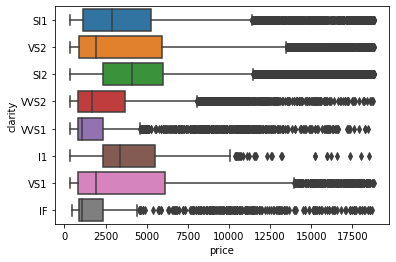

In [19]:
sns.boxplot(x = train.price, y = train["clarity"])

In [20]:
train.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
Volume        0
dtype: int64

In [21]:
train.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'Volume'],
      dtype='object')

In [22]:
train.drop(["x", "y", "z", "Unnamed: 0"], axis = 1, inplace = True)

In [23]:
train_labels = train["price"].copy()
train = train.drop(["price"], axis = 1)

In [24]:
test["Volume"] = test.x * test.y * test.z
test.drop(["x", "y", "z", "Unnamed: 0"], axis = 1, inplace = True)

In [25]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
num_attribs = ["carat", "depth", "table", "Volume"]
cat_attribs = ["cut", "color", "clarity"]
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', OrdinalEncoder(), cat_attribs)])
train_prepared = full_pipeline.fit_transform(train)

In [26]:
test_prepared = full_pipeline.fit_transform(test)

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [28]:
test_predictions = lin_reg.predict(test_prepared)

In [29]:
lin_mse = mean_squared_error(train_labels, lin_reg.predict(train_prepared))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1383.8075890861473

In [30]:
lin_rmse / train_labels.mean()

0.35097911655662156

In [31]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_labels)
test_predictions = tree_reg.predict(test_prepared)
tree_rmse = mean_squared_error(train_labels,tree_reg.predict(train_prepared), squared = False)
#tree_rmse = np.sqrt(tree_mse)
tree_rmse / train_labels.mean()

0.009580199578886854

In [32]:
tree_rmse

37.77191364627769

In [33]:
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)
test_predictions = forest_reg.predict(test_prepared)
forest_mse = mean_squared_error(train_labels,forest_reg.predict(train_prepared))
forest_rmse = np.sqrt(forest_mse)
forest_rmse / train_labels.mean()

0.05318444176772266

In [34]:
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
tree_scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-tree_scores)
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [35]:
print("Lin Scores: ", lin_rmse_scores)
print("Lin Mean: ", lin_rmse_scores.mean())
print("Lin Standard Deviation: ", lin_rmse_scores.std())
print("Tree Scores: ", tree_rmse_scores)
print("Tree Mean: ", tree_rmse_scores.mean())
print("Tree Standard Deviation: ", tree_rmse_scores.std())
print("Forest Scores: ", forest_rmse_scores)
print("Forest Mean: ", forest_rmse_scores.mean())
print("Forest Standard Deviation: ", forest_rmse_scores.std())

Lin Scores:  [1167.53003348 1255.76922229 1237.0947111  1511.5142917  2993.70215703
 2105.54261512  881.03396886  767.11145649  736.77035953  925.254877  ]
Lin Mean:  1358.1323692590445
Lin Standard Deviation:  668.513012049719
Tree Scores:  [ 689.00920402  761.76474046 1016.88687653 1679.83156428 3198.07157137
 1443.96118701  186.55397822  256.31155032  345.78639388  503.32578339]
Tree Mean:  1008.1502849498653
Tree Standard Deviation:  867.9476363156881
Forest Scores:  [ 520.81340281  570.03582646  770.61703452 1251.60940013 2709.40856052
 1357.91274394  165.31970303  211.82359704  256.0288898   406.71276165]
Forest Mean:  822.0281919905276
Forest Standard Deviation:  740.7596327740204


In [36]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(train_prepared, train_labels)
test_predictions = svm_reg.predict(test_prepared)
svm_mse = mean_squared_error(train_labels,svm_reg.predict(train_prepared))
svm_rmse = np.sqrt(svm_mse)
svm_scores = cross_val_score(svm_reg, train_prepared, train_labels, scoring = "neg_mean_squared_error", cv = 10)
svm_rmse_scores = np.sqrt(-svm_scores)
print("SVM Scores: ", svm_rmse_scores)
print("SVM Mean: ", svm_rmse_scores.mean())
print("SVM Standard Deviation: ", svm_rmse_scores.std())
svm_rmse / train_labels.mean()

SVM Scores:  [ 905.73198207  944.26513891  920.09313557 1749.22417133 4234.71152867
 2567.83159711  547.55260625  488.41080238  504.66850372  806.88166613]
SVM Mean:  1366.937113214291
SVM Standard Deviation:  1135.9498700740694


0.39969840050501115

In [37]:
param_grid = [{'n_estimators': [3,10,30], 'max_features':[2,4,6,7]},{'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}]
grid_search = GridSearchCV(forest_reg,param_grid,cv = 10, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 7],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
print("Best Params: ", grid_search.best_params_)
print("Best Estimator: ", grid_search.best_estimator_)

Best Params:  {'max_features': 4, 'n_estimators': 30}
Best Estimator:  RandomForestRegressor(max_features=4, n_estimators=30)


In [39]:
grid_search.best_estimator_.feature_importances_

array([0.38101899, 0.00697214, 0.00564869, 0.51151198, 0.00293783,
       0.03333284, 0.05857753])

In [40]:
sorted(zip(grid_search.best_estimator_.feature_importances_,num_attribs + cat_attribs))

[(0.002937828066084904, 'cut'),
 (0.005648692397406808, 'table'),
 (0.006972142289643451, 'depth'),
 (0.033332836188686515, 'color'),
 (0.058577526303559835, 'clarity'),
 (0.3810189928449173, 'carat'),
 (0.5115119819097013, 'Volume')]

In [41]:
param_distribs = {'n_estimators': np.random.randint(1, 200, 10), 'max_features': np.random.randint(1, 7, 10)}
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(train_prepared, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': array([4, 1, 1, 4, 6, 3, 4, 6, 6, 6]),
                                        'n_estimators': array([ 16, 151,  35,  31,  71,  12,   8, 166,  99, 126])},
                   scoring='neg_mean_squared_error')

In [42]:
print("Best Params: ", grid_search.best_params_)
print("Best Estimator: ", grid_search.best_estimator_)

Best Params:  {'max_features': 4, 'n_estimators': 30}
Best Estimator:  RandomForestRegressor(max_features=4, n_estimators=30)


In [43]:
sorted(zip(grid_search.best_estimator_.feature_importances_,num_attribs + cat_attribs))

[(0.002937828066084904, 'cut'),
 (0.005648692397406808, 'table'),
 (0.006972142289643451, 'depth'),
 (0.033332836188686515, 'color'),
 (0.058577526303559835, 'clarity'),
 (0.3810189928449173, 'carat'),
 (0.5115119819097013, 'Volume')]

In [44]:
np.sqrt(-rnd_search.best_score_)

1911.8840664858226

In [45]:
full_pipeline_with_predictor = Pipeline([("preparation", full_pipeline),("model", tree_reg)])
full_pipeline_with_predictor

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'Volume']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', DecisionTreeRegressor())])

In [46]:
full_pipeline_with_predictor.fit(train, train_labels)
test_predictions = full_pipeline_with_predictor.predict(test)

In [47]:
submission = pd.read_csv("/kaggle/input/shai-ml/test.csv")[["Unnamed: 0"]]
submission["price"] = test_predictions
submission

,Unnamed: 0,price
0,1,404.0
1,3,404.0
2,8,360.0
3,10,394.0
4,12,506.0
...,...,...
10895,53922,2836.0
10896,53923,3006.0
10897,53933,2830.0
10898,53934,2922.0


In [48]:
submission.to_csv("submission.csv", index = None)